In [1]:
import pandas as pd

In [2]:
# top 100 overall
rank = pd.read_csv("../data/curated/final_rank.csv").drop(columns="Unnamed: 0.1")
rank.columns = rank.columns.str.replace("Unnamed: 0", "rank")
rank["total_revenue (in hundred)"] = rank["total_revenue"] / 100

In [3]:
# rank for each categories
# category for the merchants
category_labels = rank.groupby(by="category").count().index

# rank for each category contained in the top 100 merchants result
rank_category = [rank[rank['category'] == cat] for cat in category_labels]

In [4]:
# maybe check the past transaction, revenue for a partcular merchant if necessary?

In [5]:
rank.columns

Index(['rank', 'merchant_name', 'merchant_abn', 'category',
       'total_future_transactions', 'total_future_customers', 'total_revenue',
       'total_earnings_of_BNPL', 'average_fraud_rate_per_merchant',
       'ranking_feature', 'total_revenue (in hundred)'],
      dtype='object')

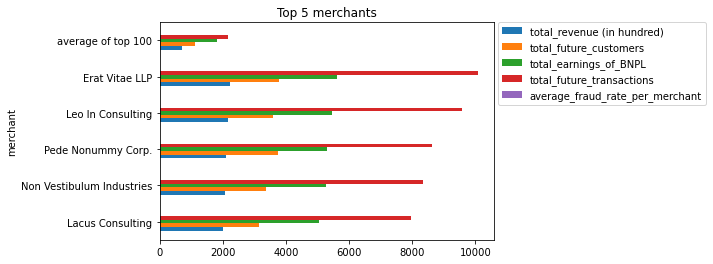

In [7]:
# calculate the average
avg_rank = rank.loc[:,["total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]].mean()
avg_rank["merchant_name"] = "average of top 100"

# 4, 3, 2, 1, 0
# get top 5 merchants
data = rank.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]]

# add average of top 100 merchants for comparison
data = data.append(avg_rank, ignore_index = True)

# label by merchant name
data = data.rename(columns={"merchant_name": "merchant"}).set_index("merchant")
data.plot.barh(title=f"Top 5 merchants").legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

In [9]:
#rank_category[0].sort_values("rank").reset_index(drop=True)

,rank,merchant_name,merchant_abn,category,total_future_transactions,total_future_customers,total_revenue,total_earnings_of_BNPL,average_fraud_rate_per_merchant,ranking_feature,total_revenue (in hundred)
0,37,Euismod In Corp.,35223308778,"Beauty, Health, Personal and Household",1688.662982,940.0,59792.717393,1509.996717,0.0,2.697216,597.927174
1,42,Amet Consulting,84703983173,"Beauty, Health, Personal and Household",1489.361510,872.0,55503.788297,1401.684716,0.0,2.487465,555.037883
2,43,Feugiat Sed Nec Institute,46298404088,"Beauty, Health, Personal and Household",1356.078237,872.0,55506.064936,1401.684716,0.0,2.461128,555.060649
3,44,Tristique Pellentesque Inc.,76626119831,"Beauty, Health, Personal and Household",1274.528547,833.0,52980.888829,1337.971774,0.0,2.345587,529.808888
4,47,Eleifend PC,67400260923,"Beauty, Health, Personal and Household",1247.690713,821.0,52471.717123,1318.857892,0.0,2.311336,524.717171
5,48,Arcu Sed Eu Incorporated,35909341340,"Beauty, Health, Personal and Household",1294.861678,801.0,50893.504230,1286.310765,0.0,2.268511,508.935042
6,53,Et Nunc Consulting,41944909975,"Beauty, Health, Personal and Household",1132.456195,769.0,49001.175627,1236.031068,0.0,2.157426,490.011756
7,54,Aliquam Auctor Associates,68559320474,"Beauty, Health, Personal and Household",1198.500293,753.0,47935.089893,1210.545891,0.0,2.130141,479.350899
8,60,Eu Inc.,42355028515,"Beauty, Health, Personal and Household",1092.575659,682.0,43641.568985,1095.862596,0.0,1.930742,436.415690
9,62,Iaculis Aliquet Diam LLC,50315283629,"Beauty, Health, Personal and Household",1018.190371,678.0,43141.580904,1089.491302,0.0,1.904900,431.415809


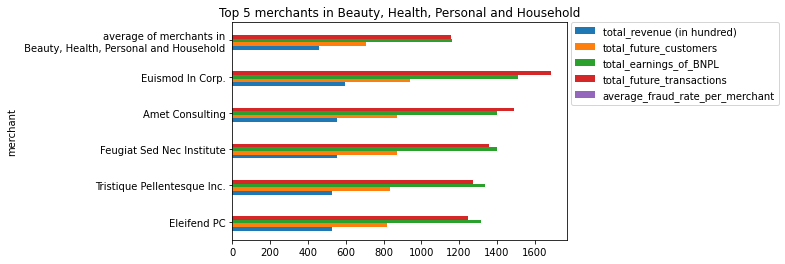

In [10]:
# make sure it is ordered byt the rank 
data = rank_category[0].sort_values("rank").reset_index(drop=True)

# category name
category = data["category"][0]

# calculate the average
avg_rank = data.loc[:,["total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]].mean()
avg_rank["merchant_name"] = f"average of merchants in\n {category}"

# top 5 wihtin the category
data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]]

# add average of merchants with category "Beauty, Health, Personal and Household" with rank above 100
data = data.append(avg_rank, ignore_index = True)

# label by merchant name
data = data.rename(columns={"merchant_name": "merchant"}).set_index("merchant")

data.plot.barh(title=f"Top 5 merchants in {category}").legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

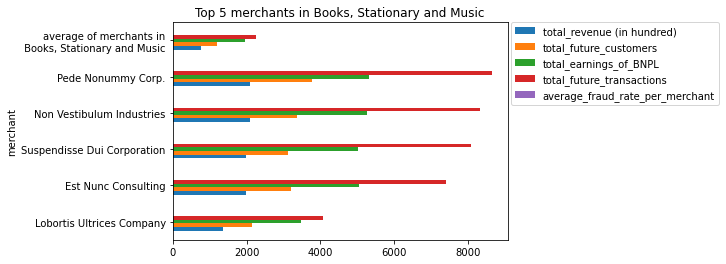

In [12]:
# make sure it is ordered byt the rank 
data = rank_category[1].sort_values("rank").reset_index(drop=True)

# category name
category = data["category"][0]

# calculate the average
avg_rank = data.loc[:,["total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]].mean()
avg_rank["merchant_name"] = f"average of merchants in\n {category}"


data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]]

# add average of merchants with category "Beauty, Health, Personal and Household" with rank above 100
data = data.append(avg_rank, ignore_index = True)

# label by merchant name
data = data.rename(columns={"merchant_name": "merchant"}).set_index("merchant")

data.plot.barh(title=f"Top 5 merchants in {category}").legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

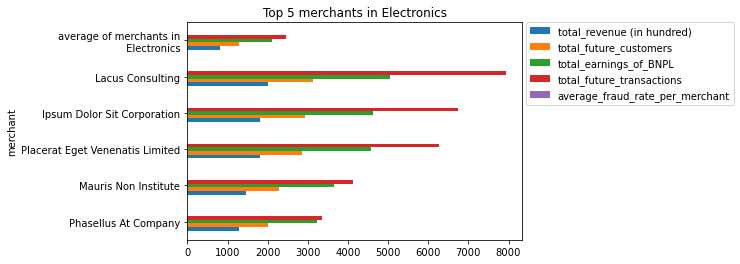

In [13]:
# make sure it is ordered byt the rank 
data = rank_category[2].sort_values("rank").reset_index(drop=True)

# category name
category = data["category"][0]

# calculate the average
avg_rank = data.loc[:,["total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]].mean()
avg_rank["merchant_name"] = f"average of merchants in\n {category}"

data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]]

# add average of merchants with category "Beauty, Health, Personal and Household" with rank above 100
data = data.append(avg_rank, ignore_index = True)

# label by merchant name
data = data.rename(columns={"merchant_name": "merchant"}).set_index("merchant")

data.plot.barh(title=f"Top 5 merchants in {category}").legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:title={'center':'Top 5 merchants in Furniture'}, ylabel='merchant'>

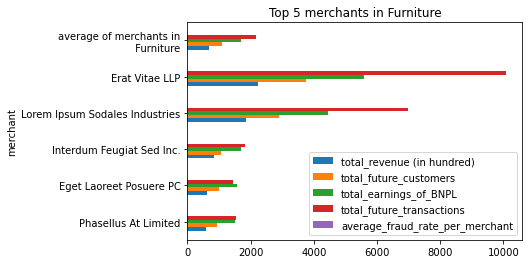

In [14]:
# make sure it is ordered byt the rank 
data = rank_category[3].sort_values("rank").reset_index(drop=True)

# category name
category = data["category"][0]

# calculate the average
avg_rank = data.loc[:,["total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]].mean()
avg_rank["merchant_name"] = f"average of merchants in\n {category}"

data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]]

# add average of merchants with category "Beauty, Health, Personal and Household" with rank above 100
data = data.append(avg_rank, ignore_index = True)

# label by merchant name
data = data.rename(columns={"merchant_name": "merchant"}).set_index("merchant")

data.plot.barh(title=f"Top 5 merchants in {category}")

<AxesSubplot:title={'center':'Top 5 merchants in Toys and DIY'}, ylabel='merchant'>

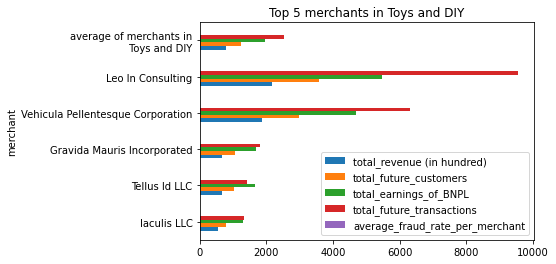

In [15]:
# make sure it is ordered by the rank 
data = rank_category[4].sort_values("rank").reset_index(drop=True)

# category name
category = data["category"][0]

# calculate the average
avg_rank = data.loc[:,["total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]].mean()
avg_rank["merchant_name"] = f"average of merchants in\n {category}"

data = data.loc[[4,3,2,1,0],["merchant_name", "total_revenue (in hundred)", "total_future_customers", "total_earnings_of_BNPL", "total_future_transactions", "average_fraud_rate_per_merchant"]]

# add average of merchants with category "Beauty, Health, Personal and Household" with rank above 100
data = data.append(avg_rank, ignore_index = True)

# label by merchant name
data = data.rename(columns={"merchant_name": "merchant"}).set_index("merchant")

data.plot.barh(title=f"Top 5 merchants in {category}")